# Please install the following python libraries
- python3: https://www.python.org/
- numpy: https://numpy.org/install/
- tqdm: https://github.com/tqdm/tqdm#installation
- matplotlib: https://matplotlib.org/stable/users/installing/index.html
- scipy: https://scipy.org/install/
- gym: https://github.com/openai/gym (**New package to install**)

If you encounter the error: "IProgress not found. Please update jupyter & ipywidgets"
    
Please install the ipywidgets as follows:

    with pip, do
    - pip install ipywidgets
    
    with conda, do
    - conda install -c conda-forge ipywidgets
    
Restart your notebook 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
from scipy.signal import savgol_filter
from scipy import stats
import time



In [2]:
"""Plot function similar to Ex1"""
def plot_curves(arr_list, legend_list, color_list, ylabel):
    """
    Args:
        arr_list (list): list of results arrays to plot
        legend_list (list): list of legends corresponding to each result array
        color_list (list): list of color corresponding to each result array
        ylabel (string): label of the Y axis

        Note that, make sure the elements in the arr_list, legend_list and color_list are associated with each other correctly.
        Do not forget to change the ylabel for different plots.
    """
    # set the figure type
    plt.clf()
    fig, ax = plt.subplots(figsize=(12, 8))

    # PLEASE NOTE: Change the labels for different plots
    ax.set_ylabel(ylabel)
    ax.set_xlabel("Steps")

    # ploth results
    h_list = []
    for arr, legend, color in zip(arr_list, legend_list, color_list):
        # compute the standard error
        arr_err = arr.std(axis=0) / np.sqrt(arr.shape[0])
        # plot the mean
        h, = ax.plot(range(arr.shape[1]), arr.mean(axis=0), color=color, label=legend)
        # plot the confidence band
        arr_err = 1.96 * arr_err
        ax.fill_between(range(arr.shape[1]), arr.mean(axis=0) - arr_err, arr.mean(axis=0) + arr_err, alpha=0.3,
                        color=color)
        # save the plot handle
        h_list.append(h)

    # plot legends
    ax.legend(handles=h_list)
    plt.show()

# Q2: Backjack 

Please note, since there is no scaffolding code for this question. Please make sure your implementation is well-tested and the comments are clear to understand. 

In [3]:
# test code for using the "Backjack" implementation from OpenAI
import gym
env = gym.make("Blackjack-v1")
env.reset()

# iteracting with the environment for 10 time steps using a random policy
for t in range(10): 
    # sample an random action
    action = env.action_space.sample()
    print(f"action = {action}")
    """
    action = 0 --> stay
    action = 1 --> hit
    """
    
    # interact with the envrionment
    next_s, reward, done, info, _ = env.step(action)
    
    # print info
    print(f"t = {t}, next_state = {next_s}, reward = {reward}, done = {done}")
    
    # check termination
    if done:
        env.reset()

action = 1
t = 0, next_state = (20, 5, False), reward = 0.0, done = False
action = 0
t = 1, next_state = (20, 5, False), reward = 1.0, done = True
action = 1
t = 2, next_state = (21, 2, False), reward = 0.0, done = False
action = 1
t = 3, next_state = (28, 2, False), reward = -1.0, done = True
action = 0
t = 4, next_state = (17, 1, False), reward = -1.0, done = True
action = 0
t = 5, next_state = (11, 2, False), reward = -1.0, done = True
action = 1
t = 6, next_state = (14, 10, False), reward = 0.0, done = False
action = 0
t = 7, next_state = (14, 10, False), reward = -1.0, done = True
action = 1
t = 8, next_state = (21, 4, False), reward = 0.0, done = False
action = 1
t = 9, next_state = (31, 4, False), reward = -1.0, done = True


## (a): Implement first-visit Monte-Carlo policy evaluation (See pseudocode on page 92). 

Please read the Example 5.1 on page 93 and reproduce the Figure 1. The policy to be evaluated is the "sticks only on 20 or 21". Please only reproduce the plots after 500, 000 episodes (Usable ace and No usable ace). 

0/500000 complete.
100000/500000 complete.
200000/500000 complete.
300000/500000 complete.
400000/500000 complete.


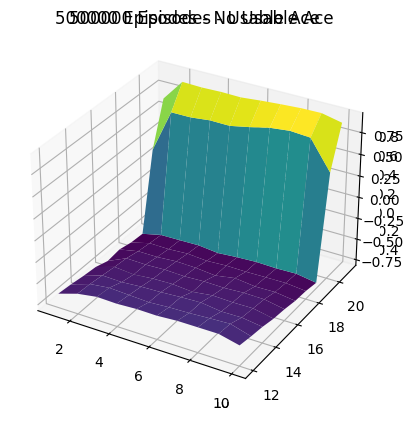

In [6]:
                                            #########################
                                            ##### MY WORK START #####
                                            #########################

# Make environment
env = gym.make("Blackjack-v1")

# initialize V(s) arrays for ace and no ace states
Vs_ace = np.zeros((10, 10))    # col (i) = dealer card; row (j) = player sum
Vs_noace = np.zeros((10, 10))  # col (i) = dealer card; row (j) = player sum

# initialize empty return lists for every state dicts
returns_ace = {}
returns_noace = {}
for deal in range(1,11):
    for play in range(12,22):
        name = str(deal) + "_" + str(play)
        returns_ace.update({name: []})
        returns_noace.update({name: []})

# Main logic
num_episodes = 500000
for i in range(num_episodes):
    if i in range(0, num_episodes, 100000):
        print(f"{i}/{num_episodes} complete.")
    env.reset()
    
    # create an episode: states, actions, and rewards list where the order goes
    # s[0], a[0], r[1], s[1], a[1], r[2], ..., s[T-1], a[T-1], r[T]
    states = []
    actions = []
    rewards = [None]
    
    count = 0
    done = False
    while done is False:
        if count == 0:
            sum_cards = sum(env.player)
            usable_ace = False
            if 1 in env.player and sum(env.player)+10 <= 21:
                sum_cards += 10
                usable_ace = True
            states = [(sum_cards, env.dealer[0], usable_ace)]
            
        if sum_cards in [20, 21]:
            # 20 or 21, stay
            action = 0
        else:
            # hit
            action = 1
        next_s, reward, done, info, _ = env.step(action)
        sum_cards, dealer_card, usable_ace = next_s
        if action == 1 and done is False:
            states.append(next_s)
        actions.append(action)
        rewards.append(reward)
        count += 1

    # now you have your episode, compute G and V(s)
    G = 0
    T = len(actions)
    for t in reversed(range(T)):
        G = 0.99*G + rewards[t+1]
        if states[t] in states[:t]:
            pass
        else:
            player_sum, dealer_card, usable_ace = states[t]
            name = str(dealer_card) + "_" + str(player_sum)
            if player_sum in range(12,22):
                if usable_ace:
                    # Vs_ace
                    returns_ace[name].append(G)
                    Vs_ace[dealer_card-1, player_sum-12] = sum(returns_ace[name])/len(returns_ace[name])
                else:
                    # Vs_noace
                    returns_noace[name].append(G)
                    Vs_noace[dealer_card-1, player_sum-12] = sum(returns_noace[name])/len(returns_noace[name])

# Plot the value function
def plot_optimal_values(state_value, title):
    x = np.linspace(1, 10, 10)
    y = np.linspace(12, 21, 10)

    X, Y = np.meshgrid(x, y)
    Z = state_value
    
    ax = plt.axes(projection='3d')
    ax.plot_surface(X, Y, Z, rstride=1, cstride=1,
                    cmap='viridis', edgecolor='none')
    ax.set_title(title)
    
plot_optimal_values(np.transpose(Vs_ace), f'{num_episodes} Episodes - Usable Ace')
plot_optimal_values(np.transpose(Vs_noace), f'{num_episodes} Episodes - No Usable Ace')

                                            #######################
                                            ##### MY WORK END #####
                                            #######################

## (b): Implement first-visit Monte-Carlo control with exploring starts (Monte-Carlo ES on page 99). 

Please read the Example 5.1 and reproduce the Figure 5.2

In [7]:
                                            #########################
                                            ##### MY WORK START #####
                                            #########################

# Make environment
env = gym.make("Blackjack-v1")

# initialize pi, Q(s, a) arrays for ace and no ace states
pi_ace = np.zeros((10, 10))       # col (i) = dealer card; row (j) = player sum
pi_noace = np.zeros((10, 10))     # col (i) = dealer card; row (j) = player sum
pi_ace[:, :8] = 1                 # initial policy (pi_0) = hit on everything besides 20 and 21
pi_noace[:, :8] = 1               # initial policy (pi_0) = hit on everything besides 20 and 21

# initialize empty return lists for every state action pair in dicts
returns_ace = {}
returns_noace = {}
Qsa_ace = {}
Qsa_noace = {}
for deal in range(1,11):
    for play in range(12,22):
        name = str(deal) + "_" + str(play)
        returns_ace.update({name: [[], []]})      # first list is action = 0, or stay
        returns_noace.update({name: [[], []]})    # second list is action = 1, or hit
        Qsa_ace.update({name: [0, 0]})            # first list is action = 0, or stay
        Qsa_noace.update({name: [0, 0]})          # second list is action = 1, or hit

# Main logic
num_episodes = 500000
for i in range(num_episodes):
    if i in range(0, num_episodes, 100000):
        print(f"{round((i/num_episodes),3)*100}%: {i}/{num_episodes} complete.")
    
    env.reset()
    
    # create an episode: states, actions, and rewards lists where the order goes
    # s[0], a[0], r[1], s[1], a[1], r[2], ..., s[T-1], a[T-1], r[T]
    states = []
    actions = []
    rewards = [None]
    
    count = 0
    done = False
    while done is False:
        if count == 0:
            sum_cards = sum(env.player)
            usable_ace = False
            if 1 in env.player and sum(env.player)+10 <= 21:
                sum_cards += 10
                usable_ace = True
            states = [(sum_cards, env.dealer[0], usable_ace)]
            action = np.random.randint(2)
        else:
            if usable_ace:
                action = int(pi_ace[dealer_card-1, sum_cards-12])
            else:
                action = int(pi_noace[dealer_card-1, sum_cards-12])
        next_s, reward, done, info, _ = env.step(action)
        sum_cards, dealer_card, usable_ace = next_s
        if action == 1 and done is False:
            states.append(next_s)
        actions.append(action)
        rewards.append(reward)
        count += 1
        
    # now you have your episode, compute G, Q(s, a), updated pi
    G = 0
    T = len(actions)
    sa_pairs = list(zip(states, actions))
    
    for t in reversed(range(T)):
        G = 0.99*G + rewards[t+1]
        if sa_pairs[t] in sa_pairs[:t]:
            pass
        else:
            state, action = sa_pairs[t]
            player_sum, dealer_card, usable_ace = state
            name = str(dealer_card) + "_" + str(player_sum)
            if player_sum in range(12,22):
                if usable_ace:
                    if action == 0:
                        # usable ace, action = 0 (stay)
                        returns_ace[name][0].append(G)
                        Qsa_ace[name][0] = sum(returns_ace[name][0])/len(returns_ace[name][0])
                    else:
                        # usable ace, action = 1 (hit)
                        returns_ace[name][1].append(G)
                        Qsa_ace[name][1] = sum(returns_ace[name][1])/len(returns_ace[name][1])
                    pi_ace[dealer_card-1, player_sum-12] = np.argmax(Qsa_ace[name])
                else:
                    if action == 0:
                        # no usable ace, action = 0 (stay)
                        returns_noace[name][0].append(G)
                        Qsa_noace[name][0] = sum(returns_noace[name][0])/len(returns_noace[name][0])
                    else:
                        # no usable ace, action = 1 (hit)
                        returns_noace[name][1].append(G)
                        Qsa_noace[name][1] = sum(returns_noace[name][1])/len(returns_noace[name][1])
                    pi_noace[dealer_card-1, player_sum-12] = np.argmax(Qsa_noace[name])

# solve for V*
Vs_ace = np.empty((10, 10))
Vs_noace = np.empty((10, 10))
for deal in range(1,11):
    for play in range(12,22):
        name = str(deal) + "_" + str(play)
        Vs_ace[deal-1, play-12] = sum(Qsa_ace[name])
        Vs_noace[deal-1, play-12] = sum(Qsa_noace[name])
        
                                            #######################
                                            ##### MY WORK END #####
                                            #######################


0.0%: 0/500000 complete.
20.0%: 100000/500000 complete.
40.0%: 200000/500000 complete.
60.0%: 300000/500000 complete.
80.0%: 400000/500000 complete.


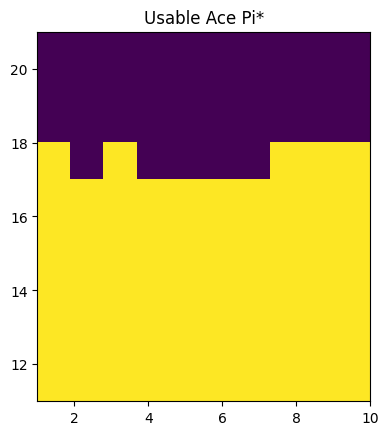

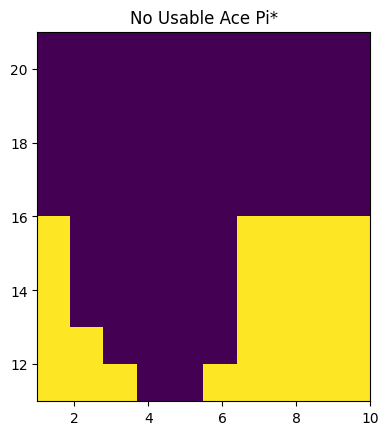

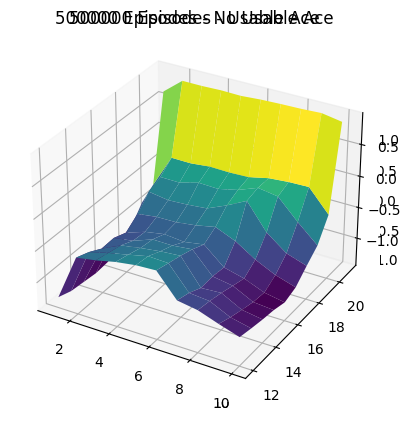

In [8]:
                                            #########################
                                            ##### MY WORK START #####
                                            #########################

plt.imshow(np.rot90(pi_ace), extent = [1, 10, 11, 21])
plt.title("Usable Ace Pi*")
plt.show()

plt.imshow(np.rot90(pi_noace), extent = [1, 10, 11, 21])
plt.title("No Usable Ace Pi*")
plt.show()

# Plot the value function
def plot_optimal_values(state_value, title):
    x = np.linspace(1, 10, 10)
    y = np.linspace(12, 21, 10)

    X, Y = np.meshgrid(x, y)
    Z = state_value
    
    ax = plt.axes(projection='3d')
    ax.plot_surface(X, Y, Z, rstride=1, cstride=1,
                    cmap='viridis', edgecolor='none')
    ax.set_title(title)
    
plot_optimal_values(np.transpose(Vs_ace), f'{num_episodes} Episodes - Usable Ace')
plot_optimal_values(np.transpose(Vs_noace), f'{num_episodes} Episodes - No Usable Ace')

                                            #######################
                                            ##### MY WORK END #####
                                            #######################

# Q3: Four Rooms, re-visited

In [9]:
"""DO NOT CHANGE"""
class FourRooms(object):
    def __init__(self):
        # define the four room as a 2-D array for easy state space reference and visualization
        # 0 represents an empty cell; 1 represents a wall cell
        self.four_room_space = np.array([[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
                                         [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
                                         [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                                         [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
                                         [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
                                         [1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0],
                                         [0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1],
                                         [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
                                         [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
                                         [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                                         [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0]])

        # find the positions for all empty cells
        # not that: the origin for a 2-D numpy array is located at top-left while the origin for the FourRooms is at
        # the bottom-left. The following codes performs the re-projection.
        empty_cells = np.where(self.four_room_space == 0.0)
        self.state_space = [[col, 10 - row] for row, col in zip(empty_cells[0], empty_cells[1])]

        # define the action space
        self.action_space = {'LEFT': np.array([-1, 0]),
                             'RIGHT': np.array([1, 0]),
                             'DOWN': np.array([0, -1]),
                             'UP': np.array([0, 1])}

        # define the start state
        self.start_state = [0, 0]

        # define the goal state
        self.goal_state = [10, 10]

        # maximal time steps
        self.max_time_steps = 459

        # track the time step
        self.t = 0

    def reset(self):
        """
        Reset the agent's state to the start state [0, 0]
        Return both the start state and reward
        """
        # reset the agent state to be [0, 0]
        state = self.start_state
        # reset the reward to be 0
        reward = 0
        # reset the termination flag
        done = False
        # reset the time step tracker
        self.t = 0
        return state, reward, done

    def step(self, state, act):
        """
        Args:
            state: a list variable containing x, y integer coordinates. (i.e., [1, 1]).
            act: a string variable (i.e., "UP"). All feasible values are ["UP", "DOWN", "LEFT", "RIGHT"].
        Output args:
            next_state: a list variable containing x, y integer coordinates (i.e., [1, 1])
            reward: an integer. it can be either 0 or 1.
        """
        # Increase the time step
        self.t += 1

        # With probability 0.8, the agent takes the correct direction.
        # With probability 0.2, the agent takes one of the two perpendicular actions.
        # For example, if the correct action is "LEFT", then
        #     - With probability 0.8, the agent takes action "LEFT";
        #     - With probability 0.1, the agent takes action "UP";
        #     - With probability 0.1, the agent takes action "DOWN".
        if np.random.uniform() < 0.2:
            if act == "LEFT" or act == "RIGHT":
                act = np.random.choice(["UP", "DOWN"], 1)[0]
            else:
                act = np.random.choice(["RIGHT", "LEFT"], 1)[0]

        # Compute the next state
        next_state = self.take_action(state, act)

        # Compute the reward
        reward = 1.0 if next_state == [10, 10] else 0.0

        # Check the termination
        # If the agent reaches the goal, reward = 1, done = True
        # If the time steps reaches the maximal number, reward = 0, done = True.
        if next_state == [10, 10] or self.t == self.max_time_steps:
            done = True
        else:
            done = False

        return next_state, reward, done

    def take_action(self, state, act):
        """
        Input args:
            state (list): a list variable containing x, y integer coordinates. (i.e., [1, 1]).
            act (string): a string variable (i.e., "UP"). All feasible values are ["UP", "DOWN", "LEFT", "RIGHT"].
        Output args:
            next_state (list): a list variable containing x, y integer coordinates (i.e., [1, 1])
        """
        state = np.array(state)
        next_state = state + self.action_space[act]
        return next_state.tolist() if next_state.tolist() in self.state_space else state.tolist()

## (a): Implement first-visit Monte-Carlo control with a epsilon-greedy policy

In [10]:
# To report the finial results, please use run_num = 10 and episode_num = 1e4

                                            #########################
                                            ##### MY WORK START #####
                                            #########################

def run_four_rooms(epsilon, num_episodes, num_trials):
    env = FourRooms()
    action_list = np.array(["LEFT", "RIGHT", "DOWN", "UP"])
    G_master = np.empty((num_trials, num_episodes))
    for trial in range(num_trials):
        #initialize Q(s, a), pi_0
        pi = np.random.randint(0, 4, (11, 11))    # initial policy (pi_0) = Random at all states
        Q_sa = {}
        returns_sa = {}
        for x in range(0, 11):
            for y in range(0, 11):
                name = "Y" + str(y) + "_X" + str(x)
                Q_sa.update({name: [0, 0, 0, 0]})              # [L, R, D, U]
                returns_sa.update({name: [[], [], [], []]})    # [[L], [R], [D], [U]]

        G_tot = []
        for i in range(num_episodes):
            if i in range(0, num_episodes, 1000):
                print(f"Trial {trial+1}: {i}/{num_episodes} episodes complete.")
            # generate an episode
            state, reward, done = env.reset()
            S = 0
            states = [state]
            actions = []
            rewards = [None]
            while done is False and S < 460:
                # choose action
                action = action_list[int(pi[state[0], state[1]])]
                actions.append(action)
                state, reward, done = env.step(state, action)
                rewards.append(reward)
                if done is False and S < 460:
                    states.append(state)
                S += 1

            G_tot.append(0.99**S)

            # now you have your episode, compute G, Q(s, a), A*, pi*
            G = 0
            T = len(actions)
            sa_pairs = list(zip(states, actions))

            for t in reversed(range(T)):
                G = 0.99*G + rewards[t+1]
                if sa_pairs[t] in sa_pairs[:t]:
                    pass
                else:
                    # append G to the state and action of returns
                    s, act = sa_pairs[t]
                    a, = np.where(action_list == act)[0]
                    name = "Y" + str(s[0]) + "_X" + str(s[1])
                    returns_sa[name][a].append(G)
                    Q_sa[name][a] = sum(returns_sa[name][a])/len(returns_sa[name][a])
                    max_as, = np.where(np.array(Q_sa[name]) == Q_sa[name][np.argmax(Q_sa[name])])
                    if len(max_as) > 1:
                        a_star = max_as[random.randint(0, len(max_as)-1)]
                    else:
                        a_star = max_as[0]
                    if random.random() < epsilon:
                        # choose random action as pi[state]
                        pi[s[0], s[1]] = np.random.randint(0,4)
                    else:
                        pi[s[0], s[1]] = a_star
        G_master[trial, :] = G_tot
    G_master = np.mean(G_master, axis=0)
    return G_master

def q3_plot_curves(G_list, num_episodes, color_list, legend_list):
    for G, color in zip(G_list, color_list):
        plt.plot(range(num_episodes), G, color)
    plt.legend(legend_list)
    plt.title("Episode Discounted Rewards - Luke Davidson Ex4 Q3")
    plt.ylabel("Discounted Return")
    plt.xlabel("Episode #")
    plt.show()

In [11]:
# Run main code
num_episodes = 10000
num_trials = 10

print("***********************************")
print("***** Running for epsilon = 0 *****")
print("***********************************")
G_master_0 = run_four_rooms(0, num_episodes, num_trials)

print("\n**************************************")
print("***** Running for epsilon = 0.01 *****")
print("**************************************")
G_master_0_01 = run_four_rooms(0.01, num_episodes, num_trials)

print("\n*************************************")
print("***** Running for epsilon = 0.1 *****")
print("*************************************")
G_master_0_1 = run_four_rooms(0.1, num_episodes, num_trials)

***********************************
***** Running for epsilon = 0 *****
***********************************
Trial 1: 0/10000 episodes complete.
Trial 1: 1000/10000 episodes complete.
Trial 1: 2000/10000 episodes complete.
Trial 1: 3000/10000 episodes complete.
Trial 1: 4000/10000 episodes complete.
Trial 1: 5000/10000 episodes complete.
Trial 1: 6000/10000 episodes complete.
Trial 1: 7000/10000 episodes complete.
Trial 1: 8000/10000 episodes complete.
Trial 1: 9000/10000 episodes complete.
Trial 2: 0/10000 episodes complete.
Trial 2: 1000/10000 episodes complete.
Trial 2: 2000/10000 episodes complete.
Trial 2: 3000/10000 episodes complete.
Trial 2: 4000/10000 episodes complete.
Trial 2: 5000/10000 episodes complete.
Trial 2: 6000/10000 episodes complete.
Trial 2: 7000/10000 episodes complete.
Trial 2: 8000/10000 episodes complete.
Trial 2: 9000/10000 episodes complete.
Trial 3: 0/10000 episodes complete.
Trial 3: 1000/10000 episodes complete.
Trial 3: 2000/10000 episodes complete.
Tria

Trial 1: 3000/10000 episodes complete.
Trial 1: 4000/10000 episodes complete.
Trial 1: 5000/10000 episodes complete.
Trial 1: 6000/10000 episodes complete.
Trial 1: 7000/10000 episodes complete.
Trial 1: 8000/10000 episodes complete.
Trial 1: 9000/10000 episodes complete.
Trial 2: 0/10000 episodes complete.
Trial 2: 1000/10000 episodes complete.
Trial 2: 2000/10000 episodes complete.
Trial 2: 3000/10000 episodes complete.
Trial 2: 4000/10000 episodes complete.
Trial 2: 5000/10000 episodes complete.
Trial 2: 6000/10000 episodes complete.
Trial 2: 7000/10000 episodes complete.
Trial 2: 8000/10000 episodes complete.
Trial 2: 9000/10000 episodes complete.
Trial 3: 0/10000 episodes complete.
Trial 3: 1000/10000 episodes complete.
Trial 3: 2000/10000 episodes complete.
Trial 3: 3000/10000 episodes complete.
Trial 3: 4000/10000 episodes complete.
Trial 3: 5000/10000 episodes complete.
Trial 3: 6000/10000 episodes complete.
Trial 3: 7000/10000 episodes complete.
Trial 3: 8000/10000 episodes co

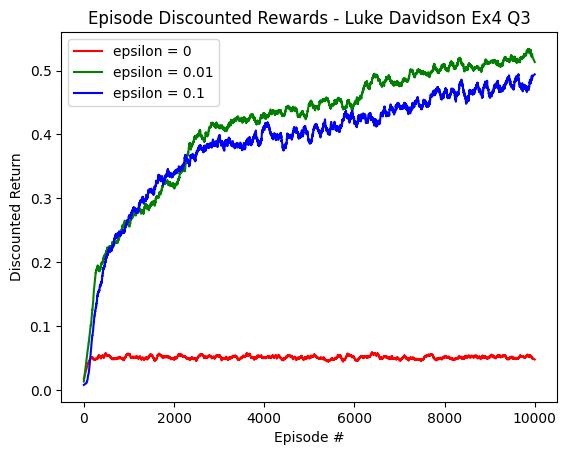

In [12]:
# Smooth G's
window_size = 101
polynomial_order = 1

G_master_0_smooth = savgol_filter(G_master_0, window_size, polynomial_order)
G_master_0_01_smooth = savgol_filter(G_master_0_01, window_size, polynomial_order)
G_master_0_1_smooth = savgol_filter(G_master_0_1, window_size, polynomial_order)

# Plot curves
q3_plot_curves([G_master_0_smooth, G_master_0_01_smooth, G_master_0_1_smooth], 
            num_episodes, 
            ["r", "g", "b"], 
            ["epsilon = 0", "epsilon = 0.01", "epsilon = 0.1"])

                                            #######################
                                            ##### MY WORK END #####
                                            #######################

## Q5: Racktrack

Please note, we provde you with the implementation of the two Racetrack domains in the Figure 5.5.

In [13]:
# Define the Racetrack domain 1
racetrack_v1_arr = np.array([
            [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
            [1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3],
            [1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3],
            [1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3],
            [1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3],
            [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3],
            [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3],
            [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1],
            [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1],
            [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1],
            [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1],
            [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1],
            [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1],
            [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1],
            [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1],
            [1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1],
            [1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1],
            [1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1],
            [1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1],
            [1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1],
            [1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1],
            [1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1],
            [1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1],
            [1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1],
            [1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1],
            [1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1],
            [1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1],
            [1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1],
            [1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1],
            [1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1],
            [1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1],
            [1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1],
            [1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1]])

racetrack_v2_arr = np.array([
            [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
            [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3],
            [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3],
            [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3],
            [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3],
            [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3],
            [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3],
            [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3],
            [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3],
            [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3],
            [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1],
            [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1],
            [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1],
            [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1],
            [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1],
            [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1],
            [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1],
            [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1],
            [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1],
            [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1],
            [1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1],
            [1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1],
            [1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1],
            [1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1],
            [1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1],
            [1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1],
            [1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1],
            [1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1],
            [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1],
            [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1],
            [1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1]])

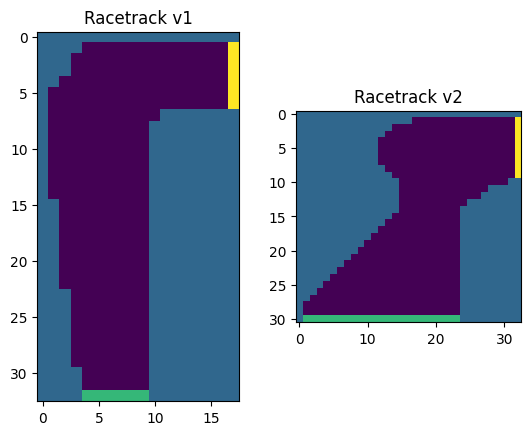

In [14]:
fig, arr = plt.subplots(1, 2)
arr[0].set_title("Racetrack v1")
arr[0].imshow(racetrack_v1_arr)
arr[1].set_title("Racetrack v2")
arr[1].imshow(racetrack_v2_arr)
plt.show()

In [15]:
"""Implementation of the Racetrack environment. Do not change"""
class Racetrack(object):
    def __init__(self, version):
        # Load the pre-defined the domain having the following representation
        #   - 1: track cell
        #   - 0: empty cell
        #   - 2: empty cell on the start line
        #   - 3: empty cell on the finish line
        if version == "v1":
            self.domain_arr = racetrack_v1_arr.copy()
        else:
            self.domain_arr = racetrack_v2_arr.copy()

        # domain size
        self.height, self.width = self.domain_arr.shape

        # State space consists of:
        # Agent location
        self.empty_cell_locs = self.render_cell_locations(val=0.0)
        self.track_cell_locs = self.render_cell_locations(val=1.0)
        self.start_cell_locs = self.render_cell_locations(val=2.0)
        self.finish_cell_locs = self.render_cell_locations(val=3.0)

        # Action space
        self.action_space = [[-1, -1], [-1, 0], [-1, 1],
                             [0, -1], [0, 0], [0, 1],
                             [1, -1], [1, 0], [1, 1]]

        # construct the state space
        self.state_space = []
        for loc in self.start_cell_locs + self.empty_cell_locs + self.finish_cell_locs:
            for i in range(5):
                for j in range(5):
                    self.state_space.append(loc + [i, j])

        # track the agent's location
        self.state = None
        self.action = None
        self.t = None

    def reset(self):
        # randomly select one cell from the start line
        start_loc = random.sample(self.start_cell_locs, 1)[0]
        # reset the velocity to be zero for both x and y directions
        start_vel = [0, 0]
        # the state is a combination of location and velocity
        # for example: [loc_x, loc_y, vel_x, vel_y]
        state = start_loc + start_vel
        # reward
        reward = None
        # done
        done = False
        # track agent's location
        self.state = tuple(state)
        self.t = 0
        return state, reward, done

    def step(self, state, action):
        """
        Args:
            state (list): a list variable consists of agent's location + agent's current velocity. e.g., [x, y, v_x, v_y]
            action (list): a list variable consists of agent's velocity increments. e.g., [increments_v_x, increments_v_y]
        """
        # reward is -1 for every time step until the agent passes the finish line
        reward = -1
        self.t += 1
        
        # with the probability = 0.1, set action = [0, 0]
        if np.random.random() < 0.1:
            action = [0, 0]

        # update the velocity components
        # note that, both velocity is discrete and constraint within [0, 4]
        next_vel_x = np.clip(state[2] + action[0], a_min=0, a_max=4)
        next_vel_y = np.clip(state[3] + action[1], a_min=0, a_max=4)
        next_state_vel = [next_vel_x, next_vel_y]

        # only the cells on the start line can have both 0 velocities
        if next_state_vel == [0, 0]:
            if state not in self.start_cell_locs:
                # non-zero for velocities
                if state[2] == 0 and state[3] != 0:
                    next_state_vel = [0, 1]
                if state[2] != 0 and state[3] == 0:
                    next_state_vel = [1, 0]
                if state[2] != 0 and state[3] != 0:
                    non_zero_idx = random.sample([0, 1], 1)[0]
                    next_state_vel[non_zero_idx] = 1

        # update the next state location based on the updated velocities
        next_state_loc = [np.clip(state[0] + next_state_vel[0], a_min=0, a_max=self.width-1),
                          np.clip(state[1] + next_state_vel[1], a_min=0, a_max=self.height-1)]

        # check whether the agent hits the track
        if next_state_loc in self.track_cell_locs:
            # move back to the start line
            next_state_loc = random.sample(self.start_cell_locs, 1)[0]
            # reduce velocity to be 0s
            next_state_vel = [0, 0]
            # episode continue
            done = False
            # next state
            next_state = next_state_loc + next_state_vel
            return next_state, reward, done

        # check whether the agent pass the finish line
        if next_state_loc in self.finish_cell_locs:
            next_state = next_state_loc + next_state_vel
            done = True
            return next_state, 0, done

        # otherwise combine the next state
        next_state = next_state_loc + next_state_vel
        # termination
        done = False

        # track the agent's state
        self.state = tuple(next_state)
        self.action = action
        return next_state, reward, done

    def render_cell_locations(self, val):
        row_loc_indices, col_loc_indices = np.where(self.domain_arr == val)
        cell_locations = [[c, (self.height-1) - r] for r, c in zip(row_loc_indices, col_loc_indices)]
        return cell_locations

    def render(self):
        plt.clf()
        plt.title(f"s = {self.state}, a = {self.action}")
        plot_arr = self.domain_arr.copy()
        plot_arr[(self.height - 1) - self.state[1], self.state[0]] = 4
        plt.imshow(plot_arr)
        plt.show(block=False)
        plt.pause(0.01)

## (a): Implement first-visit Monte-Carlo control with a epsilon-greedy policy (epsilon = 0.1)
    - Plot the learning curves for the two tracks.
    - Use running trials number = 10 and episodes number = 1e4

In [16]:
                                            #########################
                                            ##### MY WORK START #####
                                            #########################

def run_racetrack(version, epsilon, num_episodes, num_trials):
    env = Racetrack(version)
    G_master = np.empty((num_trials, num_episodes))
    Q_sa_init = {}
    returns_sa_init = {}
    for ss in env.state_space:
        # state space = [Y, X, Y_vel, X_vel]
        name = str(ss[0]) + "_" + str(ss[1]) + "_" + str(ss[2]) + "_" + str(ss[3])
        Q_sa_init.update({name: [0, 0, 0, 0, 0, 0, 0, 0, 0]})                   # [0, 1, 2, 3, 4, 5, 6, 7, 8]
        returns_sa_init.update({name: [[], [], [], [], [], [], [], [], []]})    # [[0], [1], [2], [3], [4], [5], [6], [7], [8]]
    for trial in range(num_trials):
        Q_sa = Q_sa_init
        returns_sa = returns_sa_init
        pi = {}
        for ss in env.state_space:
            name = str(ss[0]) + "_" + str(ss[1]) + "_" + str(ss[2]) + "_" + str(ss[3])
            pi.update({name: random.randint(0, 8)})    # initial policy (pi_0) = Random at all states
        G_tot = []
        for i in range(num_episodes):
            if i in range(0, num_episodes, 500):
                print(f"Trial {trial+1}: {i}/{num_episodes} episodes complete.")
            # generate an episode
            state, reward, done = env.reset()
            S = 0
            states = [state]
            actions = []
            rewards = [None]
            while done is False and S < 1000:
                # choose action
                name = str(state[0]) + "_" + str(state[1]) + "_" + str(state[2]) + "_" + str(state[3])
                action = env.action_space[pi[name]]
                actions.append(action)
                state, reward, done = env.step(state, action)
                rewards.append(reward)
                if done is False and S < 1000:
                    states.append(state)
                S += 1
            G_tot.append(0.99**S)

            # now you have your episode, compute G, Q(s, a), A*, pi*
            G = 0
            T = len(actions)
            sa_pairs = list(zip(states, actions))
            for t in reversed(range(T)):
                G = 0.99*G + rewards[t+1]
                if sa_pairs[t] in sa_pairs[:t]:
                    pass
                else:
                    # append G to the state and action of returns
                    # ([Y, X, Y_VEL, X_VEL], [Y_INC, X_INC]) ex. ([30, 25, 3, 1], [1, -1])
                    s, act = sa_pairs[t]
                    index, _ = np.where(np.array(env.action_space) == act)
                    mode, count = stats.mode(index, keepdims=True)
                    a = mode[0]
                    name = str(s[0]) + "_" + str(s[1]) + "_" + str(s[2]) + "_" + str(s[3])
                    returns_sa[name][a].append(G)
                    Q_sa[name][a] = sum(returns_sa[name][a])/len(returns_sa[name][a])
                    max_as, = np.where(np.array(Q_sa[name]) == Q_sa[name][np.argmax(Q_sa[name])])
                    if len(max_as) > 1:
                        a_star = max_as[random.randint(0, len(max_as)-1)]
                    else:
                        a_star = max_as[0]
                    if random.random() < epsilon:
                        # choose random action as pi[state]
                        pi[name] = np.random.randint(0, 9)
                    else:
                        pi[name] = a_star
        G_master[trial, :] = G_tot
    return G_master

def q5_plot_curves(G_master, num_episodes, color_list, ver):
    legend_list = []
    for i in range(G_master.shape[0]):
        plt.plot(range(num_episodes), G_master[i, :], color_list[i])
        legend_list.append(f"Trial {i+1}")
    plt.legend(legend_list)
    plt.title(f"Episode Discounted Rewards for {ver} Track - Luke Davidson Ex4 Q5a")
    plt.ylabel("Discounted Return")
    plt.xlabel("Episode #")
    plt.show()


In [17]:
num_episodes = 2000
num_trials = 10

print("**************************")
print("***** Running for v1 *****")
print("**************************")
G_master_v1 = run_racetrack("v1", 0.1, num_episodes, num_trials)

print("\n**************************")
print("***** Running for v2 *****")
print("**************************")
G_master_v2 = run_racetrack("v2", 0.1, num_episodes, num_trials)

**************************
***** Running for v1 *****
**************************
Trial 1: 0/2000 episodes complete.
Trial 1: 500/2000 episodes complete.
Trial 1: 1000/2000 episodes complete.
Trial 1: 1500/2000 episodes complete.
Trial 2: 0/2000 episodes complete.
Trial 2: 500/2000 episodes complete.
Trial 2: 1000/2000 episodes complete.
Trial 2: 1500/2000 episodes complete.
Trial 3: 0/2000 episodes complete.
Trial 3: 500/2000 episodes complete.
Trial 3: 1000/2000 episodes complete.
Trial 3: 1500/2000 episodes complete.
Trial 4: 0/2000 episodes complete.
Trial 4: 500/2000 episodes complete.
Trial 4: 1000/2000 episodes complete.
Trial 4: 1500/2000 episodes complete.
Trial 5: 0/2000 episodes complete.
Trial 5: 500/2000 episodes complete.
Trial 5: 1000/2000 episodes complete.
Trial 5: 1500/2000 episodes complete.
Trial 6: 0/2000 episodes complete.
Trial 6: 500/2000 episodes complete.
Trial 6: 1000/2000 episodes complete.
Trial 6: 1500/2000 episodes complete.
Trial 7: 0/2000 episodes comple

In [18]:
# Smooth G's
window_size = 51
polynomial_order = 1

def smooth_G(G_master, window_size, polynomial_order):
    G_master_new = np.empty_like(G_master)
    for G_row in range(G_master.shape[0]):
        G_master_new[G_row, :] = savgol_filter(G_master[G_row, :], window_size, polynomial_order)
    return G_master_new

G_master_v1_smooth = smooth_G(G_master_v1, window_size, polynomial_order)
G_master_v2_smooth = smooth_G(G_master_v2, window_size, polynomial_order)


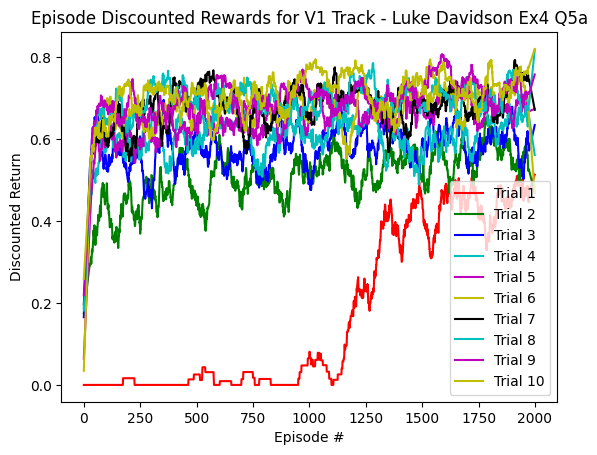

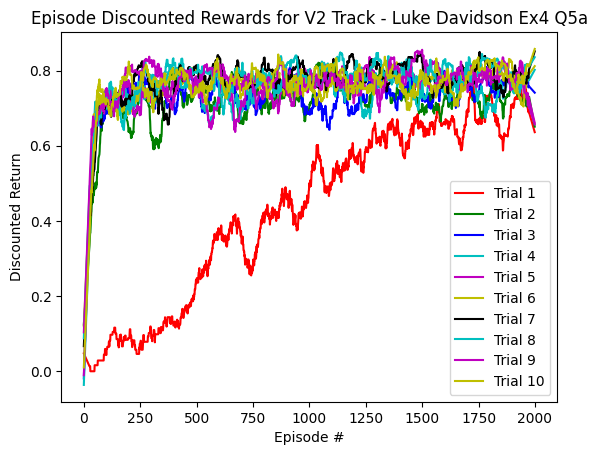

In [19]:
# Plot curves
q5_plot_curves(G_master_v1_smooth, num_episodes, ["r", "g", "b", "c", "m", "y", "k", "c", "m", "y"], "V1")
q5_plot_curves(G_master_v2_smooth, num_episodes, ["r", "g", "b", "c", "m", "y", "k", "c", "m", "y"], "V2")

                                            #######################
                                            ##### MY WORK END #####
                                            #######################

## (b): Implement off-policy Monte-Carlo control. Please specify what behavior policy you are using.
    - Plot the learning curves for the two tracks
    - Using running trials number = 10 and episodes number = 1e4

In [20]:
                                            #########################
                                            ##### MY WORK START #####
                                            #########################

def run_racetrack(version, epsilon, num_episodes, num_trials):
    env = Racetrack(version)
    G_master = np.empty((num_trials, num_episodes))
    for trial in range(num_trials):
        Q_sa = {}
        C_sa = {}
        pi = {}
        b = {}
        for ss in env.state_space:
            # state space = [Y, X, Y_vel, X_vel]
            St = str(ss[0]) + "_" + str(ss[1]) + "_" + str(ss[2]) + "_" + str(ss[3])
            """
            self.action_space = [[-1, -1], [-1, 0], [-1, 1], [0, -1], [0, 0], [0, 1], [1, -1], [1, 0], [1, 1]]
            """
            Q_sa.update({St: [    -3,      -3,    -3,     -2,     -2,    -1,    -1.5,     -2,    -2]})    # [0, 1, 2, 3, 4, 5, 6, 7, 8] np.random.random(9)
            pi.update({St: np.argmax(Q_sa[St])})
            C_sa.update({St: [0, 0, 0, 0, 0, 0, 0, 0, 0]})
            if random.random() < epsilon:
                b.update({St: random.randint(0, 8)})
            else:
                b.update({St: pi[St]})

        G_tot = []
        for i in range(num_episodes):
            if i in range(0, num_episodes, 500):
                print(f"Trial {trial+1}: {i}/{num_episodes} episodes complete.")
            
            # generate an episode following b
            state, reward, done = env.reset()
            S = 0
            states = [state]
            actions = []
            rewards = [None]
            while done is False and S < 1500:
                # choose action
                St = str(state[0]) + "_" + str(state[1]) + "_" + str(state[2]) + "_" + str(state[3])
                action = env.action_space[b[St]]
                actions.append(action)
                state, reward, done = env.step(state, action)
                rewards.append(reward)
                if done is False and S < 1500:
                    states.append(state)
                S += 1
            G_tot.append(0.99**S)

            # now you have your episode, compute G, W, C, pi and b
            G = 0
            W = 1
            T = len(actions)
            sa_pairs = list(zip(states, actions))
            for t in reversed(range(T)):
                G = 0.99*G + rewards[t+1]
                s, act = sa_pairs[t]
                index, _ = np.where(np.array(env.action_space) == act)
                mode, count = stats.mode(index, keepdims=True)
                At = mode[0]
                St = str(s[0]) + "_" + str(s[1]) + "_" + str(s[2]) + "_" + str(s[3])
                C_sa[St][At] += W
                Q_sa[St][At] += (W/(C_sa[St][At]))*(G - Q_sa[St][At])
                pi[St] = np.argmax(np.array(Q_sa[St]))
                
                # with a (1-e)% chance, b will select the same as pi, with an e% chance, it'll act randomly
                if random.random() < epsilon:
                    b[St] = np.random.randint(0,9)
                else:
                    b[St] = pi[St]
                
                if At != pi[St]:
                    break
                else:
                    W = W/((1-epsilon) + epsilon/9)
        G_master[trial, :] = G_tot
    return G_master



def q5_plot_curves(G_master, num_episodes, color_list, ver):
    legend_list = []
    for i in range(G_master.shape[0]):
        plt.plot(range(num_episodes), G_master[i, :], color_list[i])
        legend_list.append(f"Trial {i+1}")
    plt.legend(legend_list)
    plt.title(f"Episode Discounted Rewards for {ver} Track - Luke Davidson Ex4 Q5b")
    plt.ylabel("Discounted Return")
    plt.xlabel("Episode #")
    plt.show()


In [21]:
num_episodes = 2000
num_trials = 10

print("**************************")
print("***** Running for v1 *****")
print("**************************")
G_master_v1 = run_racetrack("v1", 0.1, num_episodes, num_trials)

print("\n**************************")
print("***** Running for v2 *****")
print("**************************")
G_master_v2 = run_racetrack("v2", 0.1, num_episodes, num_trials)

**************************
***** Running for v1 *****
**************************
Trial 1: 0/2000 episodes complete.
Trial 1: 500/2000 episodes complete.
Trial 1: 1000/2000 episodes complete.
Trial 1: 1500/2000 episodes complete.
Trial 2: 0/2000 episodes complete.
Trial 2: 500/2000 episodes complete.
Trial 2: 1000/2000 episodes complete.
Trial 2: 1500/2000 episodes complete.
Trial 3: 0/2000 episodes complete.
Trial 3: 500/2000 episodes complete.
Trial 3: 1000/2000 episodes complete.
Trial 3: 1500/2000 episodes complete.
Trial 4: 0/2000 episodes complete.
Trial 4: 500/2000 episodes complete.
Trial 4: 1000/2000 episodes complete.
Trial 4: 1500/2000 episodes complete.
Trial 5: 0/2000 episodes complete.
Trial 5: 500/2000 episodes complete.
Trial 5: 1000/2000 episodes complete.
Trial 5: 1500/2000 episodes complete.
Trial 6: 0/2000 episodes complete.
Trial 6: 500/2000 episodes complete.
Trial 6: 1000/2000 episodes complete.
Trial 6: 1500/2000 episodes complete.
Trial 7: 0/2000 episodes comple

In [22]:
# Smooth G's
window_size = 231
polynomial_order = 1

def smooth_G(G_master, window_size, polynomial_order):
    G_master_new = np.empty_like(G_master)
    for G_row in range(G_master.shape[0]):
        G_master_new[G_row, :] = savgol_filter(G_master[G_row, :], window_size, polynomial_order)
    return G_master_new

G_master_v1_smooth = smooth_G(G_master_v1, window_size, polynomial_order)
G_master_v2_smooth = smooth_G(G_master_v2, window_size, polynomial_order)


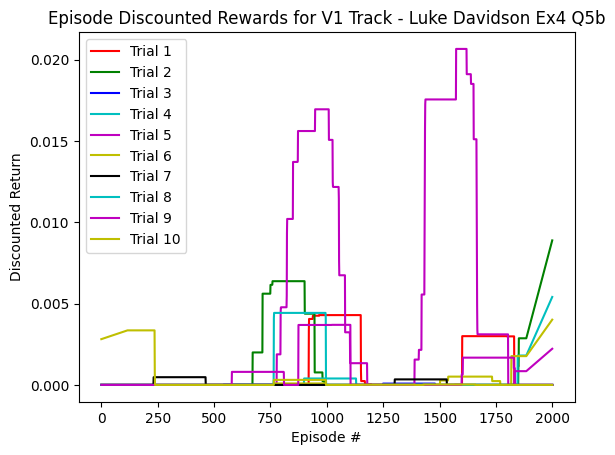

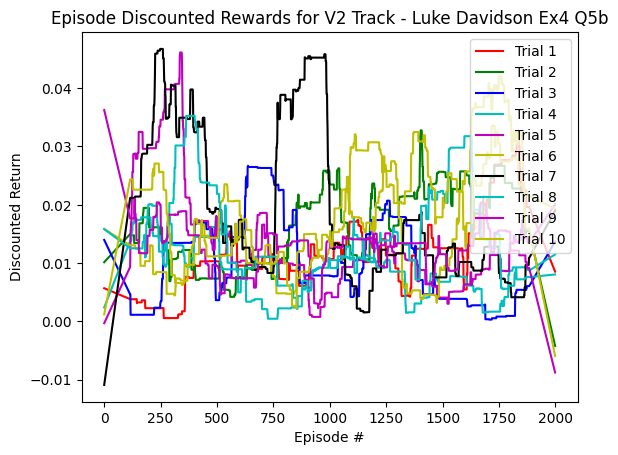

In [23]:
# Plot curves
q5_plot_curves(G_master_v1_smooth, num_episodes, ["r", "g", "b", "c", "m", "y", "k", "c", "m", "y"], "V1")
q5_plot_curves(G_master_v2_smooth, num_episodes, ["r", "g", "b", "c", "m", "y", "k", "c", "m", "y"], "V2")

                                            #######################
                                            ##### MY WORK END #####
                                            #######################